<a href="https://colab.research.google.com/github/gregoriullmann/Trabalho1_ANN_2021/blob/main/C%C3%B3pia_de_Trabalho_ANN_01_Greg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

np.random.seed(0)#implementei esta linha pois antes, cada vez que o código era executado obtinham-se diferentes resultados, não sendo o código reprodutível. Com essa linha implementada, ao se fixar uma determinada seed(x) x=0,1,2,..., selecionamos sempre o mesmo conjunto de números aleatórios para inicializar o treinamento.

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
# localiza os dados na nuvem (github) e abre a pasta do meu repositório no Github "Trabalho1_ANN_2021" em que se encontra o arquivo de dados usado
!git clone https://github.com/gregoriullmann/Trabalho1_ANN_2021
%cd Trabalho1_ANN_2021


Cloning into 'Trabalho1_ANN_2021'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.
/content/Trabalho1_ANN_2021


In [4]:
#from google.colab import drive #linha usada antes, durante a execução e estudo do trabalho, para localizar e abrir o diretório do meu Drive onde se encontram os mesmos arquivos que estão no github
#drive.mount("/content/drive")
#%cd /content/drive/My Drive/ANN/Trabalho_01/opcao01
#%ls

In [5]:
# leitura dos dados do arquivo "dados" no github, dados apresentados em dataframe
DAT=pd.read_csv("dados.csv", sep=';')
print(DAT)


    Run  Time     v   Co  pH  efficiency
0     1    60  0.12  100   7       95.80
1     2    40  0.18  100   7       85.70
2     3    60  0.18   50   3       95.38
3     4    40  0.12  100   3       85.20
4     5    40  0.12  100   7       86.40
5     6    20  0.06   50  11       94.10
6     7    20  0.06   50   3       91.69
7     8    60  0.06   50   3       93.24
8     9    20  0.18  150  11       55.10
9    10    20  0.18   50   3       57.80
10   11    60  0.06  150   3       94.20
11   12    40  0.12  150   7       80.88
12   13    20  0.06  150   3       62.42
13   14    60  0.06  150  11       93.80
14   15    40  0.12  100   7       92.60
15   16    40  0.06  100   7       91.34
16   17    40  0.12  100   7       92.40
17   18    60  0.06   50  11       94.20
18   19    40  0.12  100   7       93.10
19   20    20  0.18   50  11       84.00
20   21    40  0.12  100   7       91.20
21   22    60  0.18  150  11       92.90
22   23    40  0.12  100  11       93.10
23   24    60  0

In [6]:
# separa as colunas de interesse, a coluna 0 é a coluna "Run", que não interessa para os cálculos, por isso peguei as demais 4 variáveis (Time, v, Co, pH) e 1 resposta (efficiency)
Index=[1,2,3,4,5]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
#print(Dat_Select) #imprime o novo dataframe - para controle pessoal da implementação.

In [7]:
# funcao para normatizar dados
def Normatiza(x):
    strings=list(x)  #pega os dados da lista e os coloca em uma string que será percorrida pelo "for"
    for i in strings:
        max_x=x[i].max() #pega o maior valor de cada variável e da resposta
        min_x=x[i].min() #pega o menor valor de cada variável e da resposta
        a=min_x #associa o valor menor à variável "a"
        b=max_x #associa o valor maior à variável "b"
        x[i]=(x[i]-a)/(b-a) #equação de acordo com a Equação 6 do artigo.
    return x

In [8]:
# funcao retorna os dados para a forma original
# idem o bloco anterior, a única diferença é que foi realizado um algebrismo na equação anterior para calcular a os valores na forma original 
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=min_x
        b=max_x
        x[i]=x[i]*(b-a)+a #Equação 6 do artigo algebricamente modificada para cálculo do valor original
    return x

In [9]:
# separa os dados em normatizados e originais
DAT_OLD=[]  #cria uma lista para alocar os dados no formato original
DAT_OLD=Dat_Select.copy() #aloca os dados da lista Dat_Select na lista DAT_OLD
DAT=Normatiza(Dat_Select) #Define a lista DAT com os dados da Dat_Select normatizada

In [10]:
# separa os dados em treino "train" e teste "test" 
train=DAT.sample(frac=0.8,random_state=None) #foram selecionados 80% dos dados para treino
test=DAT.drop(train.index) #o restante (20%) foi selecionado para teste
#print(DAT) #para controle próprio

In [11]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3]] #equivalem as colunas das variáveis "Time" "v" "Co" "pH"
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]
#print(x_train) # para controle próprio

In [12]:
# obtem as variaveis dependentes (treino e teste)
y_train=train.iloc[:,[4]] #equivale à resposta "efficiency"
y_test=test.iloc[:,[4]]
Y_OLD=DAT_OLD.iloc[:,[4]]
#print(y_train) # para controle próprio

In [13]:
# define a rede neural 
#foi selecionado o solver 'lbfgs', a função de ativação aplicada foi a sigmoide 'logistic' conforme o artigo, o alfa padrão da biblioteca sklearn foi usado 10^-4, o número de neurônios na camada oculta foi definido 6 conforme o valor ótimo observado pelos autores no artigo, os demais parâmetros foram mantidos no default  
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=0.0001,hidden_layer_sizes=(6,),learning_rate='constant', random_state=None)

In [14]:
# treina a rede neural
clf.fit(x_train, y_train) #comando clf.fit para treinar a rede neural no caso do uso da biblioteca sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [15]:
# usa a rede neural para predição de resultados do treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [16]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [17]:
# transforma dos dados calculados na forma original (nao normatizado) usando a função 'Original' definida anteriormente no código
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [18]:
# recupera os dados originais 
test=[] # cria a lista 'test' para colocar os dados de teste e os originais
train=[] # cria a lista 'train' para colocar os dados de treino e os originais
train=Original(y_train,Y_OLD) # inclui nessa lista os dados de treino e originais
test=Original(y_test,Y_OLD) # inclui nessa lista os dados de teste e originais

In [19]:
# escolhe uma das resposta para fazer o grafico (efficiency-treino)
effici_obs_train=[] # cria a lista 'effici_obs_train' para colocar os dados de eficiência originais observados
effici_calc_train=[] # cria a lista 'effici_calc_train' para colocar os dados de eficiência do treino calculados
effici_calc_train=y_calc_train['efficiency'].copy() # coloca os dados de eficiência na coluna 'efficiency' da lista
effici_obs_train=train['efficiency'].copy() # coloca os dados de eficiência na coluna 'efficiency' da lista

In [20]:
# escolhe uma das resposta para fazer o grafico (efficiency-teste) idem o raciocínio do bloco anterior
effici_obs_test=[]
effici_calc_test=[]
effici_calc_test=y_calc_test['efficiency'].copy()
effici_obs_test=test['efficiency'].copy()

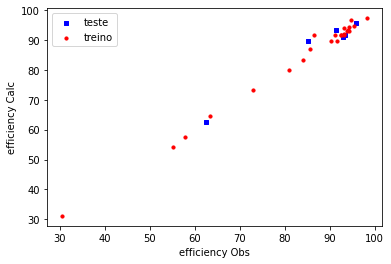

In [21]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
# nos eixos do gráfico a eficiência vai de aprox. 30% a 100% pulando de 10 em 10%, daí o s=10
ax1.scatter(effici_obs_test,effici_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(effici_obs_train,effici_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('efficiency Calc')
plt.xlabel('efficiency Obs')
plt.show()
#podemos observar que os pontos de teste e treino seguiram comportamentos bem próximos com a linha de 45 graus, indicando um ajuste bom da rede neural

In [22]:
#a função mse usada aqui corresponde à mesma usada pelos autores (conferi no manual do sklearn)
#entretanto apesar da boa predição e bons resultados da rede neural, os valores de MSE teste e treino e R2 teste e treino ainda foram bastante diferentes dos obtidos no artigo
#Artigo: MSEteste=7.46x10-3 R2teste=0.9989  MSEtreino=2.89x10-5 R2treino=0.9996
#Meu trabalho: MSEteste=5.1879 R2teste=0.9601  MSEtreino=2.1758 R2treino=0.9917
mse=mean_squared_error(effici_obs_test,effici_calc_test)
print("MSE teste=",mse)
R2=r2_score(effici_obs_test,effici_calc_test)
print("R^2 teste=",R2)

MSE teste= 5.187993832737375
R^2 teste= 0.9601247869727183


In [23]:
mse=mean_squared_error(effici_obs_train,effici_calc_train)
print("MSE treino=",mse)
R2=r2_score(effici_obs_train,effici_calc_train)
print("R^2 treino=",R2)

MSE treino= 2.1758088567930387
R^2 treino= 0.9917537202536774
